In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
import seaborn as sns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()


In [3]:
df = pd.read_csv('data/train.csv', index_col=0)


In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: >

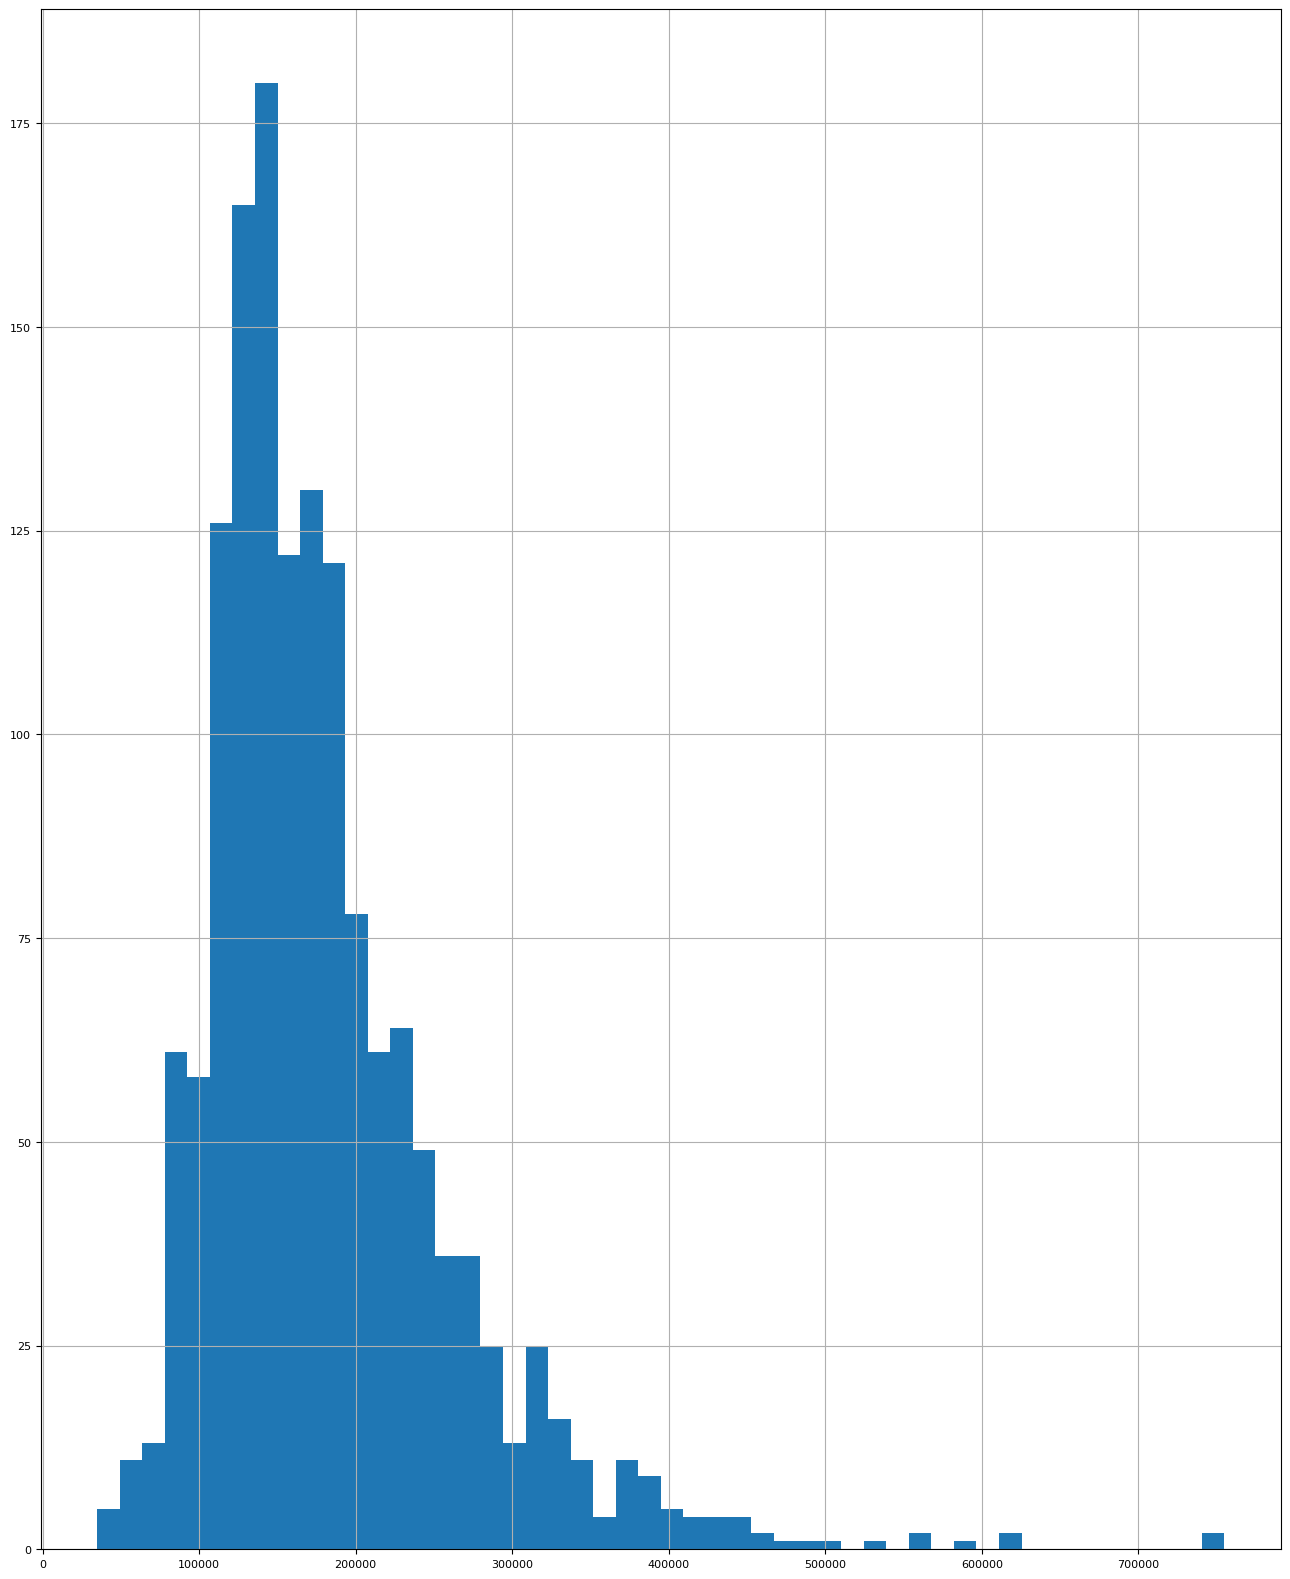

In [12]:
df['SalePrice'].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

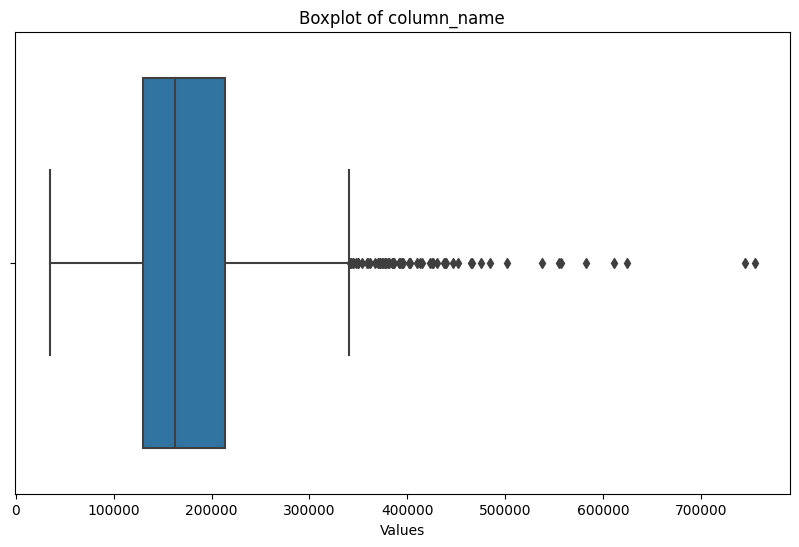

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of column_name')
plt.xlabel('Values')
plt.show()

Get rid of outliers

In [13]:
sale_price_threshold = 500000
df = df[df['SalePrice'] < sale_price_threshold]


In [ ]:
df_num = df.drop(columns='SalePrice').select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


In [ ]:
df_cat = df.drop(columns='SalePrice').select_dtypes(include = ['object'])
# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(df_cat.columns), ncols=1, figsize=(16, 200))
fig.tight_layout(pad=5.0)

# Iterate through each categorical column and create a bar plot
for ax, col in zip(axes, df_cat.columns):
    df_cat[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

plt.show()


Check for duplicates

In [ ]:
n_duplicates = df.duplicated().sum()
print(f'Number of duplicates: {n_duplicates}')

In [ ]:
df['Exterior1st'].isna().sum()

Check for typos

In [ ]:
print("No typos found.")

Convert the appropriate categorical variables to numercial ones and converting nas to a category, when makes sense according to the ´data_description´ file.
Convert the variable ´MSSubClass´ and the remaining object variables to categorical.

In [14]:
# Clean up: fill NaN values with 'NA'
columns_to_fill_na = ['Electrical', 'Alley', 'MasVnrType', 'MiscFeature', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


# Define mapping dictionaries for each variable
mapping = {
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'LandContour': {'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4},
    'Utilities': {'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'PoolQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},
    'Alley': {'Pave': 2, 'Grvl': 1, 'NA': 0}
}

# Apply mappings to each column in the DataFrame
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in columns_to_fill_na:
    df[col].fillna('NA', inplace=True)

df = df.apply(lambda col: col.map(mapping[col.name]) if col.name in mapping else col)

for col in categorical_columns:
    df[col] = df[col].astype('category')


C:\Users\Botond\AppData\Local\Temp\ipykernel_16764\4258600434.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna('NA', inplace=True)


In [15]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_dummies = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X and transform X
X_imputed = imputer.fit_transform(X_dummies)

df_cleaned = pd.DataFrame(X_imputed, index=X_dummies.index, columns=X_dummies.columns)

numeric_columns = ['LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold']
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])


In [ ]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [10, 15, 20],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (neg_mean_squared_error):", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=21, n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
log_y_pred = np.log(y_pred)

log_y_test = np.log(y_test)

rmse = np.sqrt(mean_squared_error(log_y_test, log_y_pred))

print("RMSE (log scale):", rmse)


RMSE (log scale): 0.14940543328861275


In [24]:
df_test = pd.read_csv('data/test.csv', index_col=0)
for col in columns_to_fill_na:
    df_test[col].fillna('NA', inplace=True)

df_test = df_test.apply(lambda col: col.map(mapping[col.name]) if col.name in mapping else col)

for col in categorical_columns:
    df_test[col] = df_test[col].astype('category')
    
X_test_dummies = pd.get_dummies(df_test, drop_first=True)
missing_columns = [col for col in X_dummies.columns if col not in X_test_dummies]
X_test_dummies[missing_columns] = 0
X_test_dummies = X_test_dummies[X_dummies.columns]
X_test_imputed = imputer.fit_transform(X_test_dummies)

df_test = pd.DataFrame(X_test_imputed, index=X_test_dummies.index, columns=X_test_dummies.columns)

df_test[numeric_columns] = scaler.fit_transform(df_test[numeric_columns])


In [26]:
model.fit(df_cleaned, y)

y_pred = model.predict(df_test)
df_guess = pd.DataFrame(y_pred, columns=['SalePrice'])
df_guess['Id'] = range(1461, 2920)
df_guess = df_guess[['Id', 'SalePrice']]
df_guess.to_csv('df_guess.csv', index=False)


In [27]:
df_cleaned

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.150685,0.033420,0.0,0.000000,0.0,0.0,0.0,0.666667,0.500,0.949275,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.202055,0.038795,0.0,0.000000,0.0,0.0,0.0,0.555556,0.875,0.753623,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.160959,0.046507,0.0,0.333333,0.0,0.0,0.0,0.666667,0.500,0.934783,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.133562,0.038561,0.0,0.333333,0.0,0.0,0.0,0.666667,0.500,0.311594,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.215753,0.060576,0.0,0.333333,0.0,0.0,0.0,0.777778,0.500,0.927536,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.140411,0.030929,0.0,0.000000,0.0,0.0,0.0,0.555556,0.500,0.920290,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.219178,0.055505,0.0,0.000000,0.0,0.0,0.0,0.555556,0.625,0.768116,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.154110,0.036187,0.0,0.000000,0.0,0.0,0.0,0.666667,1.000,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
df_test

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.329609,0.184147,0.0,0.000000,0.000000,0.0,0.0,0.444444,0.625,0.625954,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1462,0.335196,0.232124,0.0,0.333333,0.000000,0.0,0.0,0.555556,0.625,0.603053,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1463,0.296089,0.224197,0.0,0.333333,0.000000,0.0,0.0,0.444444,0.500,0.900763,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1464,0.318436,0.154326,0.0,0.333333,0.000000,0.0,0.0,0.555556,0.625,0.908397,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1465,0.122905,0.064121,0.0,0.333333,0.666667,0.0,0.0,0.777778,0.500,0.862595,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.000000,0.008453,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.750,0.694656,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2916,0.000000,0.007691,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.500,0.694656,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.776536,0.336115,0.0,0.000000,0.000000,0.0,0.0,0.444444,0.750,0.618321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
